# Table of Contents
 <p><div class="lev1"><a href="#Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1"><a href="#Load-in-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load in the data</a></div><div class="lev1"><a href="#Examine-events-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine events</a></div>

In [1]:
# Boilerplate startup
import numpy as np
import matplotlib.pyplot as plt

# Include plots within this notebook
%matplotlib inline 

import matplotlib
matplotlib.rc('font', size=16)
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # resize plots

import hax
hax.init(experiment='XENON100')
print("This may give a warning 'ShimWarning: The `IPython.kernel` package has been deprecated.' " 
      "Just ignore it.")

hax.ipython.code_hider()

This may give a warning 'ShimWarning: The `IPython.kernel` package has been deprecated.' Just ignore it.


/home/jelle/anaconda3/envs/pax/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# Introduction

When you see weird events or populations in your analysis, one of the first things to do is to inspect the event waveforms. This is a nice way to check if pax is doing something strange, or if there is some physical oddity with the events.

When you have direct access to the raw data, and know the event you want to see, you can  use pax's plotting functionality:

    paxer --input your_data --event 134 --plot
    
This gets you a plot in which you can zoom in.

However, it is a bit inconvenient to first extract the event numbers and dataset names, get the raw data, then call pax like this. It would be nicer if you could get at least a basic waveform plot directly from your analysis notebook. This notebook shows you how to do that using `hax`.

**Sofware prerequisite**: This notebook will only work if you have either 1) access to the raw data locally (e.g. an SSH mount of xecluster) or 2) access to The XENON GRID VO. In either case hax.ini must be set up appropriately.

# Load in the data

Let's load in an AmBe dataset (just like in the hax tutorial):

In [2]:
data = hax.minitrees.load('xe100_120404_0804')

Found minitree at ./xe100_120404_0804_Basics.root


and make a basic S1/S2 plot (just like in the hax tutorial):

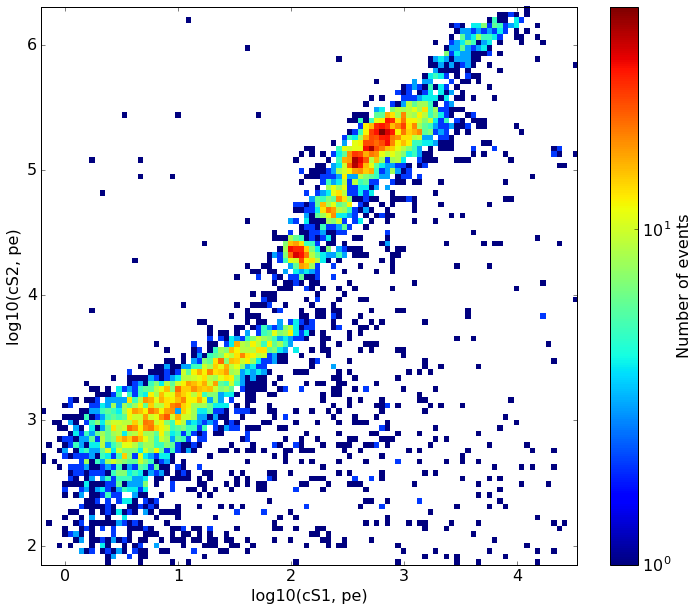

In [3]:
# Require a proper S1
data = data[data['cs1'] > 0]

# Make an S1 vs S2 histogram
plt.hist2d(np.log10(data['cs1']), np.log10(data['cs2']),
           bins=100, 
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('log10(cS1, pe)')
plt.ylabel('log10(cS2, pe)')
plt.show()

# Examine events

There are some weird events in the top left corner with very high S2 but very low S1. Let's first select them:

In [4]:
weird_events = data[(data['cs1'] < 10) & (data['cs2'] > 1e5)]
print("Selected %d events" % len(weird_events))

Selected 3 events


and let's examine them:

In [5]:
hax.raw_data.inspect_events_from_minitree?

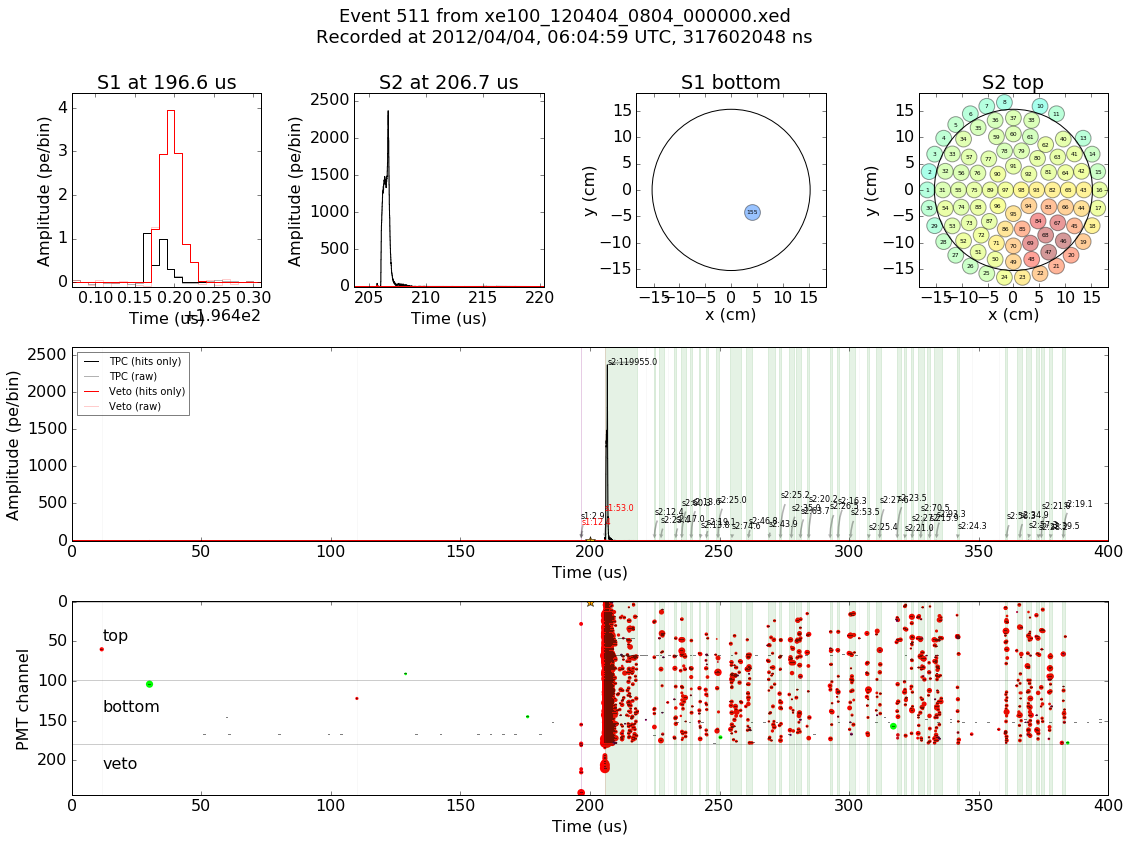

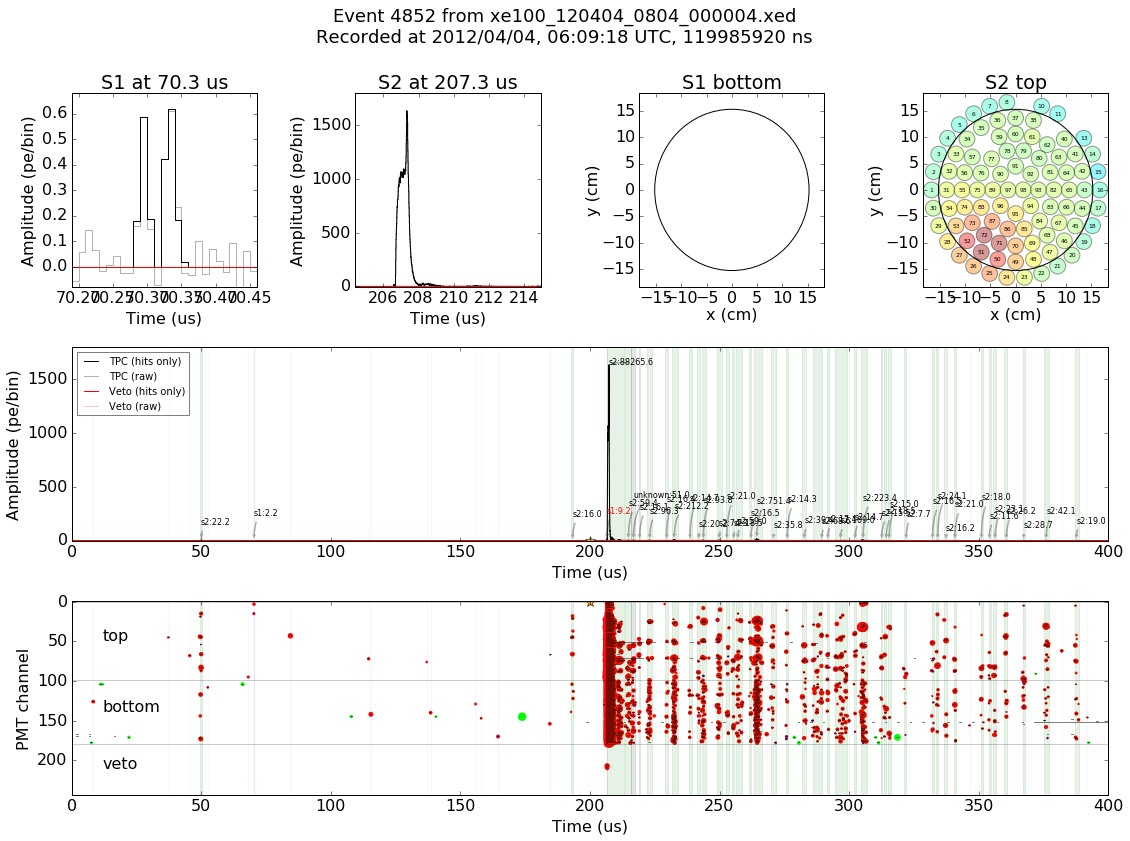

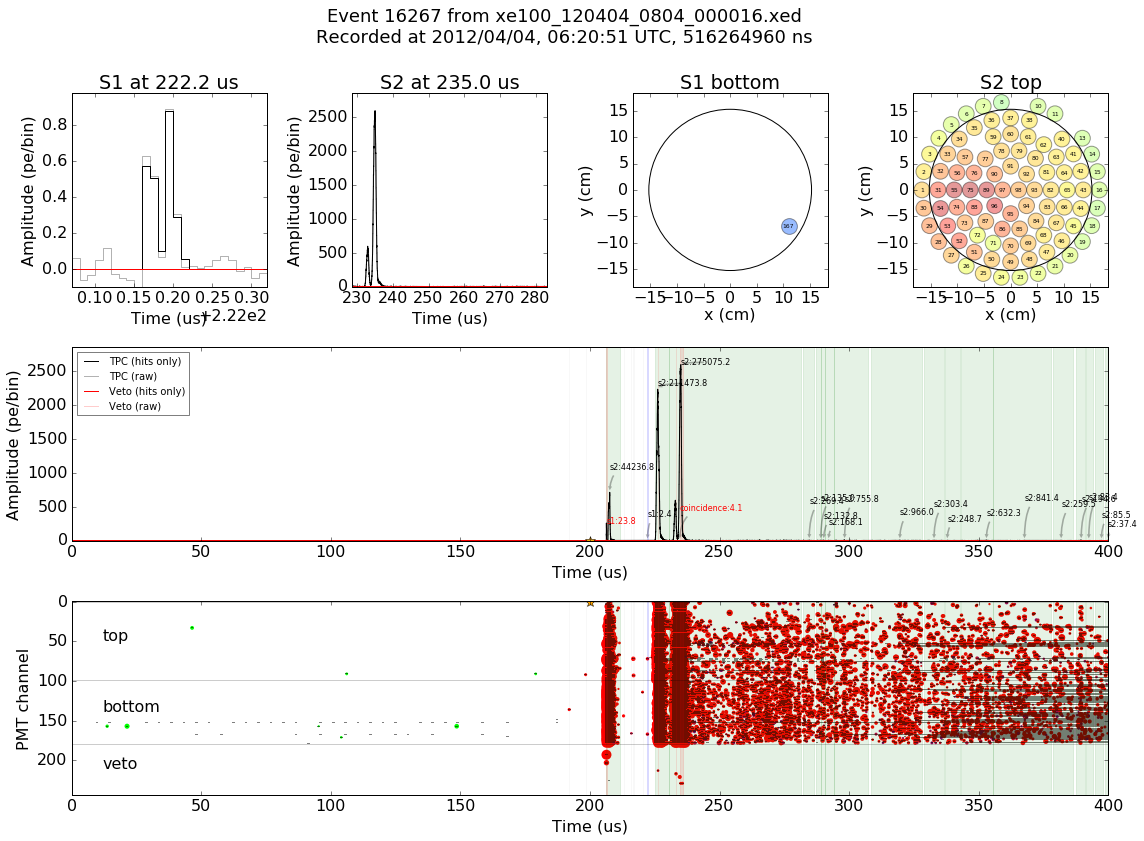

In [6]:
hax.raw_data.inspect_events_from_minitree(weird_events)

If you want to focus on a particular peak, say the S1 in the first event, use the 'focus' argument:

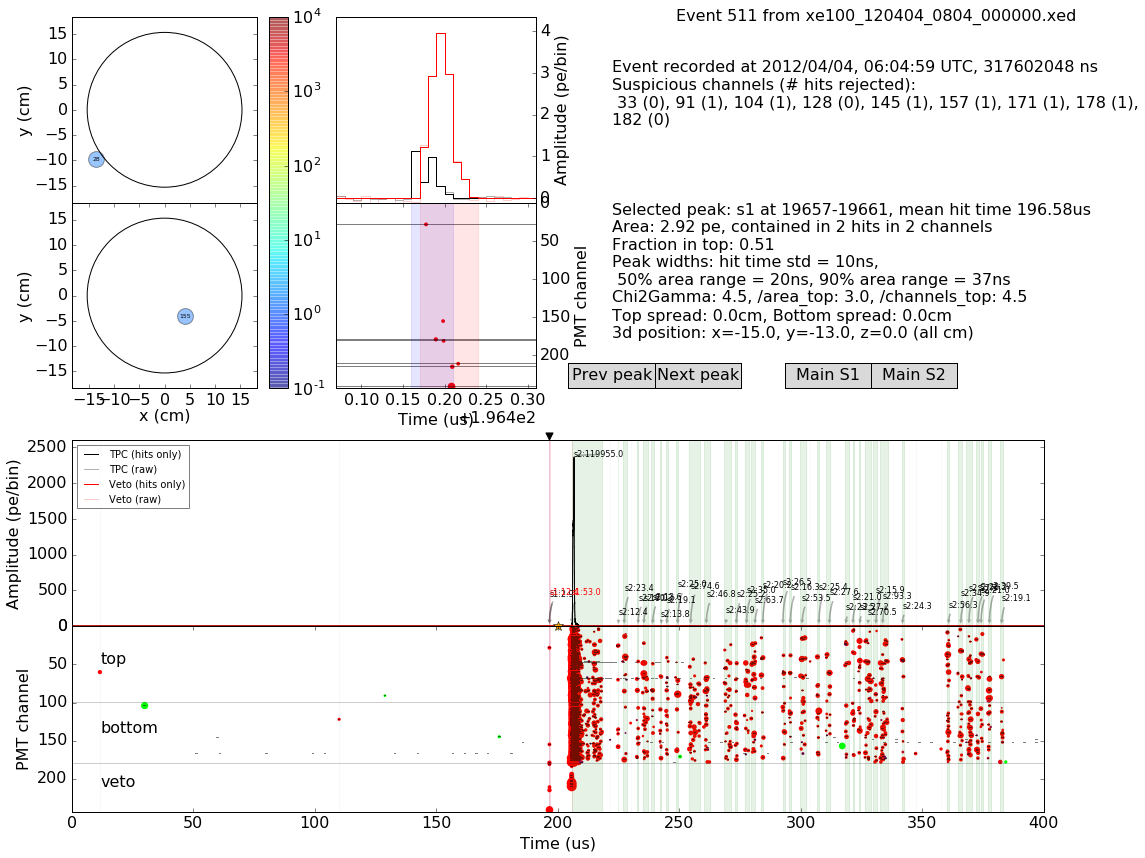

In [13]:
hax.raw_data.inspect_events_from_minitree(weird_events[0:1], focus='main_s1')